Question 2

Import libraies

In [9]:
import math
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:
data = np.zeros((10000,100))
Y = np.zeros((10000,1))

i=0
with open('E:\ACADS STUFF\Semester 6\prml\Assignment 2\A2Q2Data_Train.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:        
        for j in range(0,len(row)):
            if(j!=100):
                data[i][j] = row[j]
            if(j==100):
                Y[i][0] = row[j]
        i+=1

Normalising the data - for ease and better representative values

In [53]:
data_mean = np.mean(data, axis=1, keepdims=True)
data_std = np.std(data, axis=1, keepdims=True)
data_normalized = (data - data_mean) / data_std

Y_mean = np.mean(Y)
Y_std = np.std(Y)
Y_normalized = (Y - Y_mean) / Y_std

X is a matrix with each column being the data point - ie a dxn matrix

In [54]:
data_normalized

array([[ 0.27841207, -0.42040807,  1.15566895, ...,  1.56238966,
         1.18898033,  1.44304384],
       [ 1.32183198, -0.09558797,  1.55610413, ..., -0.54202726,
        -0.2225466 ,  1.1988707 ],
       [-0.33051156,  1.4678502 , -1.19030766, ...,  0.47661272,
        -0.65930216,  0.1845699 ],
       ...,
       [ 1.34441072,  1.73407539,  1.30131995, ...,  1.10652457,
        -0.72860239,  1.47989162],
       [ 0.77985706, -0.21365687, -0.79274387, ...,  1.19955453,
         0.05220459, -1.49580875],
       [-0.59740729, -1.79505493, -1.81768773, ...,  1.20083614,
        -1.84061852,  1.61791112]])

In [55]:
data_normalized = data_normalized.T
X = data_normalized
Y = Y_normalized


The analytical solution calculation

In [13]:
W_ml_analytical = np.linalg.pinv(np.matmul(X,X.T)).dot(X).dot(Y) 

In [14]:
print(f"W_ml = {W_ml_analytical}")

W_ml = [[-0.02865624]
 [-0.03459042]
 [-0.02891011]
 [-0.02069131]
 [ 0.08122204]
 [-0.02554913]
 [-0.01760668]
 [ 0.07746851]
 [-0.0254412 ]
 [ 0.25937842]
 [-0.01845088]
 [-0.0203953 ]
 [-0.01512477]
 [-0.02122986]
 [-0.02133773]
 [-0.01924684]
 [-0.02069984]
 [-0.02103804]
 [-0.03173696]
 [-0.02806632]
 [-0.03261375]
 [-0.03133755]
 [-0.02233567]
 [-0.0314623 ]
 [-0.01626537]
 [-0.02788692]
 [-0.02248093]
 [-0.02242148]
 [-0.02118823]
 [-0.03053027]
 [-0.02743314]
 [-0.02304798]
 [-0.01979576]
 [-0.02337813]
 [-0.02978406]
 [-0.02246789]
 [-0.01772631]
 [-0.03391328]
 [-0.03760968]
 [ 0.30516252]
 [-0.03129388]
 [-0.02623104]
 [-0.02711273]
 [-0.02893066]
 [-0.02885651]
 [-0.02319469]
 [-0.03233043]
 [-0.02336792]
 [-0.02000553]
 [-0.00912818]
 [ 0.22839446]
 [-0.02604034]
 [-0.0240914 ]
 [-0.02372869]
 [ 0.1350718 ]
 [-0.01727888]
 [-0.02735419]
 [-0.01608243]
 [-0.03266484]
 [ 0.41292375]
 [-0.03153124]
 [-0.02633222]
 [-0.02140183]
 [-0.02424598]
 [-0.02315881]
 [-0.02497128]
 [-

Gradient descent

In [56]:

import random
number_of_iterations = 30000
W_gd = np.random.rand(100,1)
difference_w = np.zeros(number_of_iterations)
for i in range(0,number_of_iterations):
    W_gd = W_gd - ( 0.00000008/(i+1))*(2*X.dot(X.T).dot(W_gd)-2*X.dot(Y))
    difference_w[i] = (np.linalg.norm(W_gd - W_ml_analytical))

Gradient descent with a learning rate proportional to 1/t

In [16]:
def grad_desc_log(X,Y,beta):
    iter_no = 30000
    W_ml = np.random.rand(100,1)
    difference_w = np.zeros(iter_no)

    for i in range(0,iter_no):
        W_ml = W_ml - (beta/(i+1))*(2*X.dot(X.T).dot(W_ml)-2*X.dot(Y))
        difference_w[i] = (np.linalg.norm(W_ml - W_ml_analytical))
    return difference_w


Gradient descent with a learning rate of constant value

In [17]:
def grad_desc(X,Y,alpha):
    iter_no = 30000
    W_ml = np.random.rand(100,1)
    difference_w = np.zeros(iter_no)

    for i in range(0,iter_no):
        W_ml = W_ml - (alpha)*(2*X.dot(X.T).dot(W_ml)-2*X.dot(Y))
        difference_w[i] = (np.linalg.norm(W_ml - W_ml_analytical))
    return difference_w


In [18]:
beta_007 = grad_desc_log(X,Y,0.007)
beta_1 = grad_desc_log(X,Y,1)
beta_0000008 = grad_desc_log(X,Y,0.00000008)


C:\Users\aniru\AppData\Local\Temp\ipykernel_11820\344305629.py:7: RuntimeWarning: overflow encountered in multiply
  W_ml = W_ml - (beta/(i+1))*(2*X.dot(X.T).dot(W_ml)-2*X.dot(Y))


In [19]:
alpha_001 = grad_desc(X,Y,0.001)
alpha_0001 = grad_desc(X,Y,0.0001)
alpha_000001 = grad_desc(X,Y,0.000001)


C:\Users\aniru\AppData\Local\Temp\ipykernel_11820\3533441062.py:7: RuntimeWarning: overflow encountered in multiply
  W_ml = W_ml - (alpha)*(2*X.dot(X.T).dot(W_ml)-2*X.dot(Y))


Plots to compare different learning rates

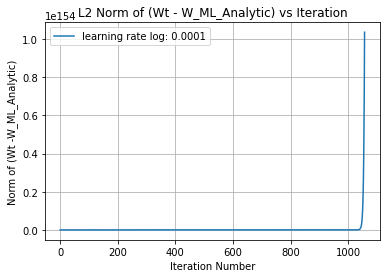

In [20]:
import matplotlib.pyplot as plt
plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),alpha_0001,label = "learning rate log: 0.0001")
plt.xlabel("Iteration Number")
plt.ylabel("Norm of (Wt -W_ML_Analytic)")
plt.legend()
plt.grid(True)
plt.show()

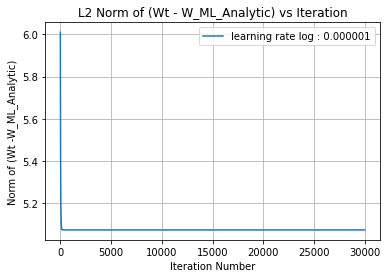

In [21]:
import matplotlib.pyplot as plt
plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
#plt.plot(np.linspace(0,iter_no-1,iter_no),alpha_0001,label = "learning rate : 0.0001")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),alpha_000001,label = "learning rate log : 0.000001")
#plt.plot(np.linspace(0,iter_no-1,iter_no),alpha_001,label = "learning rate : 0.001")
plt.xlabel("Iteration Number")

plt.ylabel("Norm of (Wt -W_ML_Analytic)")



plt.legend()
plt.grid(True)

plt.show()



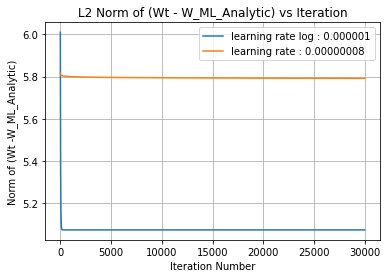

In [22]:
import matplotlib.pyplot as plt
plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
#plt.plot(np.linspace(0,iter_no-1,iter_no),alpha_0001,label = "learning rate : 0.0001")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),alpha_000001,label = "learning rate log : 0.000001")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),beta_0000008,label = "learning rate : 0.00000008")
#plt.plot(np.linspace(0,iter_no-1,iter_no),alpha_001,label = "learning rate : 0.001")
plt.xlabel("Iteration Number")

plt.ylabel("Norm of (Wt -W_ML_Analytic)")



plt.legend()
plt.grid(True)

plt.show()



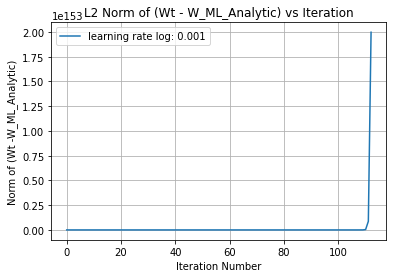

In [23]:
import matplotlib.pyplot as plt
plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
#plt.plot(np.linspace(0,iter_no-1,iter_no),alpha_0001,label = "learning rate : 0.0001")
#plt.plot(np.linspace(0,iter_no-1,iter_no),alpha_000001,label = "learning rate : 0.000001")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),alpha_001,label = "learning rate log: 0.001")
plt.xlabel("Iteration Number")

plt.ylabel("Norm of (Wt -W_ML_Analytic)")



plt.legend()
plt.grid(True)

plt.show()



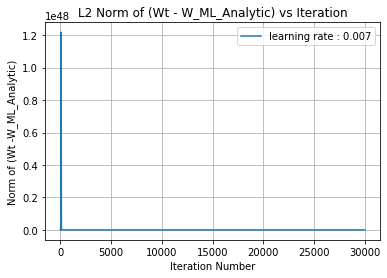

In [24]:

plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Norm of (Wt -W_ML_Analytic)")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),beta_007,label = "learning rate : 0.007")
#plt.plot(np.linspace(0,iter_no-1,iter_no),beta_1,label = "learning rate : 1")
#plt.plot(np.linspace(0,iter_no-1,iter_no),beta_0000008,label = "learning rate : 0.00000008")
plt.legend()
plt.grid(True)
plt.show()



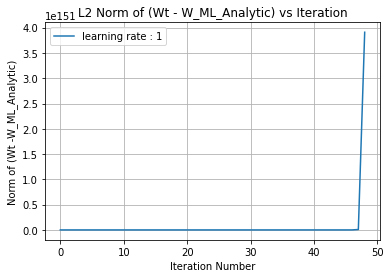

In [25]:

plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Norm of (Wt -W_ML_Analytic)")
#plt.plot(np.linspace(0,iter_no-1,iter_no),beta_007,label = "learning rate : 0.007")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),beta_1,label = "learning rate : 1")
#plt.plot(np.linspace(0,iter_no-1,iter_no),beta_0000008,label = "learning rate : 0.00000008")
plt.legend()
plt.grid(True)
plt.show()



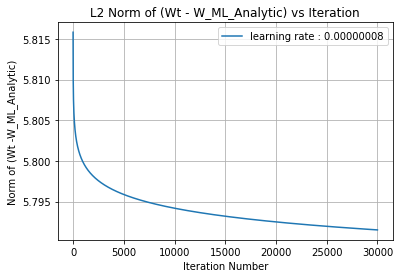

In [26]:

plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Norm of (Wt -W_ML_Analytic)")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),beta_0000008,label = "learning rate : 0.00000008")
plt.legend()
plt.grid(True)
plt.show()



Stochastic Gradient Descent

In [27]:
import random
number_of_iterations = 50000
batch_size = 100
W_average = np.zeros((100,1))
W_ml_batch = np.random.rand(100,1)
difference_w = np.zeros(number_of_iterations)
for i in range(0,number_of_iterations):
    random_index = random.sample(range(0,10000),100)
    X_batch = np.zeros((100,100))
    Y_batch = np.zeros((100,1))
    for h in range(0,batch_size):
        X_batch[:,h] = X[:,random_index[h]]
        Y_batch[h][0] = Y[random_index[h]]
    W_ml_batch = W_ml_batch - (0.000001/(i+1))*(2*X_batch.dot(X_batch.T).dot(W_ml_batch)-2*X_batch.dot(Y_batch))
    difference_w[i] = (np.linalg.norm(W_ml_batch - W_ml_analytical))
    W_average += W_ml_batch
W_average = W_average / number_of_iterations
W_sgd = W_average

C:\Users\aniru\AppData\Local\Temp\ipykernel_11820\2848843272.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_batch[h][0] = Y[random_index[h]]


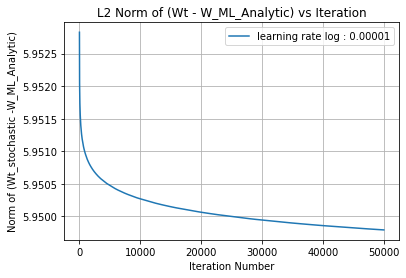

In [28]:
plt.title("L2 Norm of (Wt - W_ML_Analytic) vs Iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Norm of (Wt_stochastic -W_ML_Analytic)")
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),difference_w,label = "learning rate log : 0.00001")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
print(np.linalg.norm(Y-X.T.dot(W_average)))

300.47758179454354


Ridge Regression

In [30]:
data = np.zeros((10000,100))
Y = np.zeros((10000,1))

i=0
with open('E:\ACADS STUFF\Semester 6\prml\Assignment 2\A2Q2Data_Train.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:        
        for j in range(0,len(row)):
            if(j!=100):
                data[i][j] = row[j]
            if(j==100):
                Y[i][0] = row[j]
        i+=1
data = data.T

In [31]:
X = data
W_ml_analytic = np.linalg.pinv(np.matmul(X,X.T)).dot(X).dot(Y) 

80-20 split Cross Validation

In [32]:
X = data
W = np.zeros((100,20))
p = 0
o = [0 for i in range(20)]
for lam in np.linspace(0,10,20):
    W_ml = np.random.rand(100,1)
    for iter_no in range(1,10000):
        W_ml = W_ml - (0.000075/iter_no)*((2*X[:,0:8000].dot(X[:,0:8000].T).dot(W_ml))-2*(X[:,0:8000].dot(Y[0:8000,:])) - 2*lam*W_ml)  
    W[:,p] = W_ml[:,0]
    o[p] =  lam
    p+=1

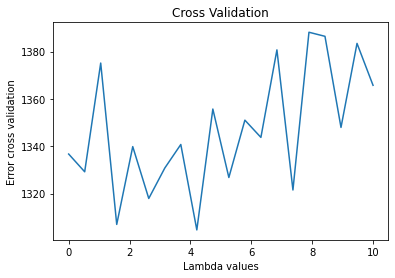

In [33]:
error = np.zeros(20)
for p in range(0,20):
    error[p] = np.linalg.norm(Y[8000:10000,:]-X[:,8000:10000].T.dot(W[:,p]))  
plt.plot(o,error)
plt.title("Cross Validation")
plt.xlabel("Lambda values")
plt.ylabel("Error cross validation")
plt.show()

In [34]:
index = np.argmin(error)
optimal_lambda = np.linspace(0,10,20)[index]
W_rigde_regression_80 = np.linalg.inv(X.dot(X.T)+optimal_lambda*np.identity(100)).dot(X).dot(Y)

In [35]:
optimal_lambda

4.2105263157894735

K fold cross validation
k =5 

In [36]:

k = 5
num_samples = X.shape[1]
fold_size = num_samples // k
errors = np.zeros((k, 20))
W_values = np.zeros((100, 20, k))
for fold in range(k):
    test_indices = range(fold * fold_size, (fold + 1) * fold_size)
    train_indices = [i for i in range(num_samples) if i not in test_indices]
    X_train = X[:, train_indices]
    Y_train = Y[train_indices, :]
    X_test = X[:, test_indices]
    Y_test = Y[test_indices, :]
    p = 0
    o = [0 for i in range(20)]
    for lam in np.linspace(0, 10, 20):
        W_ml = np.random.rand(100, 1)
        for iter_no in range(1, 10000):
            W_ml = W_ml - (0.000075 / iter_no) * (
                        (2 * X_train.dot(X_train.T).dot(W_ml)) - 2 * (X_train.dot(Y_train)) - 2 * lam * W_ml)
        W_values[:, p, fold] = W_ml[:, 0]
        o[p] = lam
        p += 1
    for p in range(20):
        error = (np.linalg.norm(Y_test - X_test.T.dot(W_values[:, p, fold])))
        errors[fold, p] = error
average_errors = np.mean(errors, axis=0)


In [37]:
index = np.argmin(average_errors)
optimal_lambda = np.linspace(0,10,20)[index]
W_rigde_regression_k = np.linalg.inv(X.dot(X.T)+optimal_lambda*np.identity(100)).dot(X).dot(Y)

In [38]:
optimal_lambda

0.5263157894736842

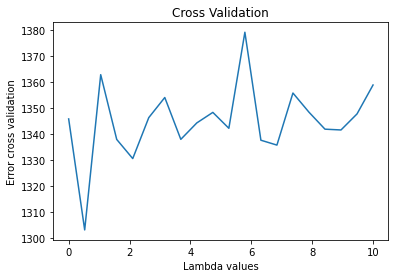

In [39]:

plt.plot(o,average_errors)
plt.title("Cross Validation")
plt.xlabel("Lambda values")
plt.ylabel("Error cross validation")
plt.show()

Predction and error metrices on Test data

In [46]:
W_sgd

array([[0.37762119],
       [0.37166977],
       [0.15514032],
       [0.70403329],
       [0.61963159],
       [0.14684858],
       [0.01469928],
       [0.0925048 ],
       [0.20265698],
       [0.69117138],
       [0.9964189 ],
       [0.95650819],
       [0.97480082],
       [0.33476881],
       [0.94924943],
       [0.10187214],
       [0.68381351],
       [0.2763792 ],
       [0.76534107],
       [0.08562253],
       [0.78160617],
       [0.58585508],
       [0.85471879],
       [0.97773454],
       [0.72902925],
       [0.02463029],
       [0.41361753],
       [0.24514777],
       [0.60556506],
       [0.52205263],
       [0.2340657 ],
       [0.60254385],
       [0.04846109],
       [0.09716833],
       [0.93032925],
       [0.38737859],
       [0.2660743 ],
       [0.90643233],
       [0.61215038],
       [0.82485074],
       [0.37870639],
       [0.22124812],
       [0.40208786],
       [0.1732476 ],
       [0.64688761],
       [0.83725407],
       [0.31677277],
       [0.649

In [57]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
data = np.zeros((10000,100))
Y = np.zeros((10000,1))
i=0

with open('E:\ACADS STUFF\Semester 6\prml\Assignment 2\A2Q2Data_Test.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:        
        for j in range(0,len(row)):
            if(j!=100):
                data[i][j] = row[j]
            if(j==100):
                Y[i][0] = row[j]
        i+=1

data_normalized = (data - data_mean) / data_std

Y_normalized = (Y - Y_mean) / Y_std

data_normalized = data_normalized.T
X = data_normalized
Y = Y_normalized


print(f"error for W_ml is {(np.linalg.norm(Y-X.T.dot(W_ml_analytic)))}")
print(f"error for W_gd is {(np.linalg.norm(Y-X.T.dot(W_gd)))}")
print(f"error for W_ridge k fold {(np.linalg.norm(Y-X.T.dot(W_rigde_regression_k)))}")
print(f"error for W_ridge 80 - 20 {(np.linalg.norm(Y-X.T.dot(W_rigde_regression_80)))}")
print(f"error for W_sgd  {(np.linalg.norm(Y-X.T.dot(W_sgd)))}")

error for W_ml is 333.3176056371603
error for W_gd is 8335.59382180449
error for W_ridge k fold 333.31478486792054
error for W_ridge 80 - 20 333.29512511353624
error for W_sgd  8371.031480424257
